<a href="https://colab.research.google.com/github/garvit968/LangchainTut/blob/main/BaseModelsNeural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
X = tf.reshape(tf.range(12),(3,4))
Y = tf.reshape(tf.range(12), (-1,4))
X==Y, X>Y, X<Y

(<tf.Tensor: shape=(3, 4), dtype=bool, numpy=
 array([[ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]])>,
 <tf.Tensor: shape=(3, 4), dtype=bool, numpy=
 array([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])>,
 <tf.Tensor: shape=(3, 4), dtype=bool, numpy=
 array([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])>)

In [ ]:
import tensorflow as tf
x=tf.reshape(tf.range(6),(3,1,2)) # 3 stacks 1 row 2 cols
x

<tf.Tensor: shape=(3, 1, 2), dtype=int32, numpy=
array([[[0, 1]],

       [[2, 3]],

       [[4, 5]]], dtype=int32)>

In [ ]:
import os
os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..','data','house_tiny.csv')
with open(data_file, 'w') as f:
  f.write('''
  NumRooms,RoofType,Price
NA,NA,127500
2,NA,12000
2,Slate,44545
4,Concrete,NA
  ''')

In [ ]:
import pandas as pd
df = pd.read_csv(data_file)
df

,NumRooms,RoofType,Price
0,NaN,NaN,127500.0
1,2.0,NaN,12000.0
2,2.0,Slate,44545.0
3,4.0,Concrete,NaN


In [ ]:
df.describe()

,NumRooms,Price
count,3.000000,3.000000
mean,2.666667,61348.333333
std,1.154701,59555.239134
min,2.000000,12000.000000
25%,2.000000,28272.500000
50%,2.000000,44545.000000
75%,3.000000,86022.500000
max,4.000000,127500.000000


In [ ]:
df.isna().sum()

,0
NumRooms,1
RoofType,2
Price,1


In [ ]:
df.head()

,NumRooms,RoofType,Price
0,NaN,NaN,127500.0
1,2.0,NaN,12000.0
2,2.0,Slate,44545.0
3,4.0,Concrete,NaN


In [ ]:
df.sample(2)

,NumRooms,RoofType,Price
2,2.0,Slate,44545.0
3,4.0,Concrete,NaN


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X1 = np.random.normal(5,2,1000)
# plt.hist(x=X1, bins = 30)
# plt.show
X2 = X1*0.8 + np.random.normal(0,0.6,1000)
X3 = np.random.normal(-1, 1.5,1000)
X4 = np.random.uniform(0,10,1000)
beta_vals = np.array([2.5,-1.2,0.6,0.05])

noise = np.random.normal(0,1.2,1000)
y = beta_vals[0]*X1+beta_vals[1]*X2+beta_vals[2]*X3+beta_vals[3]*X4+0.4*(X4**2)*0.01+noise

X=np.vstack([X1,X2,X3,X4]).T
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.3)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

def ols_closed_form(X,y):
  Xb = np.hstack([np.ones((X.shape[0],1)), X])
  beta_hat = np.linalg.pinv(Xb.T @ Xb) @ Xb.T @ y
  return beta_hat

beta_hat = ols_closed_form(X_train_s, y_train)
print("Closed-form OLS coefficients (intercept first):")
print(beta_hat)

Closed-form OLS coefficients (intercept first):
[ 7.69643187  4.84128891 -1.98302023  0.97909982  0.27411044]


Closed-form OLS coefficients (intercept first):
[ 7.24840819  4.96819604 -1.98317424  0.81773369  0.28120323]
Train RMSE: 1.2033539565702054
Test  RMSE: 1.1914136325857707
Test R^2: 0.8802822829747798
GD coefficients (intercept first): [ 7.24840819  4.96819604 -1.98317424  0.81773369  0.28120323]
Best Ridge alpha: {'alpha': 0.1} best CV MSE: 1.4696808518306568
Ridge Test RMSE: 1.191152154766841
Ridge Test R^2: 0.8803348257552366
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1470.
Date:                Sun, 07 Sep 2025   Prob (F-statistic):               0.00
Time:                        19:20:04   Log-Likelihood:                -1283.2
No. Observations:                 800   AIC:                             2576.
Df Residuals: 

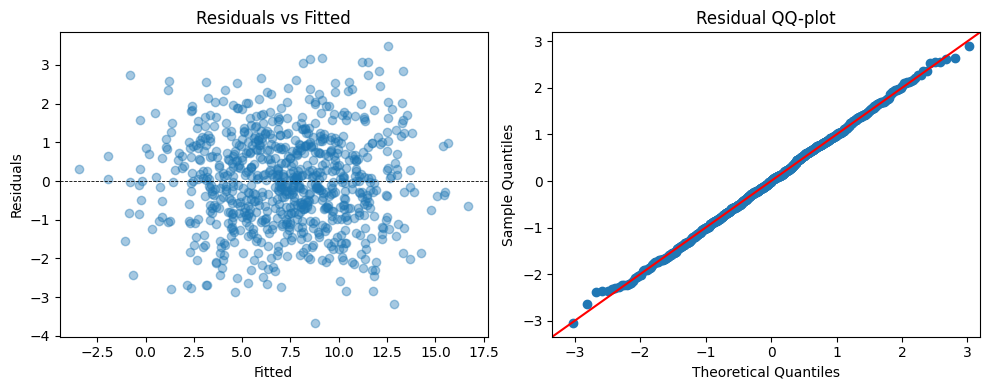

Poly Ridge Test RMSE: 1.2125491538211957


In [24]:
# pip install numpy scipy scikit-learn statsmodels matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

np.random.seed(0)

# 1) Synthesize data
N = 1000
# base features with some correlation
x1 = np.random.normal(5, 2, N)
x2 = 0.8 * x1 + np.random.normal(0, 0.6, N)    # correlated with x1
x3 = np.random.normal(-1, 1.5, N)
# non-linear effect we'll treat via feature engineering
x4 = np.random.uniform(0, 10, N)
# true coefficients (including a small effect for x3)
beta_true = np.array([2.5, -1.2, 0.6, 0.05])  # weights for x1..x4
# Construct target with noise and small nonlinearity
noise = np.random.normal(0, 1.2, N)
y = beta_true[0]*x1 + beta_true[1]*x2 + beta_true[2]*x3 + beta_true[3]*x4 \
    + 0.4 * (x4**2) * 0.01 + noise  # slight quadratic signal in x4

# Stack into design matrix
X = np.vstack([x1, x2, x3, x4]).T

# 2) Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3) Preprocess: scale
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

# 4) OLS closed form (with bias term)
def ols_closed_form(X, y):
    # add intercept column
    Xb = np.hstack([np.ones((X.shape[0], 1)), X])
    # use pseudo-inverse for stability
    beta_hat = np.linalg.pinv(Xb.T @ Xb) @ Xb.T @ y
    return beta_hat  # [intercept, coef...]

beta_hat = ols_closed_form(X_train_s, y_train)
print("Closed-form OLS coefficients (intercept first):")
print(beta_hat)

# Predictions and metrics
def predict_with_beta(beta, X):
    Xb = np.hstack([np.ones((X.shape[0],1)), X])
    return Xb @ beta

y_pred_train = predict_with_beta(beta_hat, X_train_s)
y_pred_test  = predict_with_beta(beta_hat, X_test_s)

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Test  RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("Test R^2:", r2_score(y_test, y_pred_test))

# 5) Gradient descent (batch) for least squares — show interviewer you can do opt
def gradient_descent(X, y, lr=1e-2, n_iter=2000, verbose=False):
    # X assumed scaled, add bias column
    Xb = np.hstack([np.ones((X.shape[0], 1)), X])  # (N, d+1)
    N, D = Xb.shape
    w = np.zeros(D)
    for it in range(n_iter):
        preds = Xb @ w
        grad = (2.0/N) * (Xb.T @ (preds - y))
        w -= lr * grad
        if verbose and (it % 500 == 0):
            loss = np.mean((preds - y)**2)
            print(f"iter {it}, mse {loss:.4f}")
    return w

w_gd = gradient_descent(X_train_s, y_train, lr=0.05, n_iter=5000)
print("GD coefficients (intercept first):", w_gd)

# 6) Ridge with CV selection for alpha
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
param_grid = {"alpha": [0.0, 0.01, 0.1, 1.0, 10.0, 50.0]}
cv = KFold(n_splits=5, shuffle=True, random_state=0)
grid = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=cv)
grid.fit(X_train_s, y_train)
print("Best Ridge alpha:", grid.best_params_, "best CV MSE:", -grid.best_score_)

best_ridge = grid.best_estimator_
y_ridge_test = best_ridge.predict(X_test_s)
print("Ridge Test RMSE:", np.sqrt(mean_squared_error(y_test, y_ridge_test)))
print("Ridge Test R^2:", r2_score(y_test, y_ridge_test))

# 7) Statsmodels OLS for inference (CIs, p-values)
X_train_sm = sm.add_constant(X_train_s)  # statsmodels needs explicit constant
ols_sm = sm.OLS(y_train, X_train_sm).fit()
print(ols_sm.summary())  # includes coefficients, std err, t, p-values, CI

# 8) Diagnostics: residuals vs fitted and QQ-plot
y_train_fit = ols_sm.fittedvalues
resid = ols_sm.resid

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(y_train_fit, resid, alpha=0.4)
plt.axhline(0, color='k', linestyle='--', linewidth=0.6)
plt.xlabel('Fitted'); plt.ylabel('Residuals'); plt.title('Residuals vs Fitted')

plt.subplot(1,2,2)
sm.qqplot(resid, line='45', fit=True, ax=plt.gca())
plt.title('Residual QQ-plot')
plt.tight_layout()
plt.show()

# 9) If asked for nonlinearity handling: add polynomial feature and refit
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_s)
X_test_poly  = poly.transform(X_test_s)
ridge2 = Ridge(alpha=grid.best_params_['alpha'])
ridge2.fit(X_train_poly, y_train)
print("Poly Ridge Test RMSE:", np.sqrt(mean_squared_error(y_test, ridge2.predict(X_test_poly))))


In [8]:
import numpy as np

#Data Creation
def make_circle_data(n_samples = 1000, noise = 0.1, radius = 0.6, seed = 42):
  rn = np.random.RandomState(seed)
  X = rn.randn(n_samples, 2)

  X = X*1.5
  r = np.linalg.norm(X, axis = 1)
  if noise>0:
    r += noise*rn.rand(n_samples)
  y = (r<=radius).astype(np.int32)
  return X.T, y.reshape(1,-1)

# Activation Functions
def sigmoid(Z):
  return 1/(1+np.exp(-Z))

def sigmoid_deriv(Z):
  return sigmoid(Z)*(1 - sigmoid(Z))

def relu(Z):
  return np.maximum(0,Z)

def relu_deriv(Z):
  return (Z>0).astype(float)

def tanh(Z):
  return np.tanh(Z)

def tanh_deriv(Z):
  return 1-np.tanh(Z)**2

def softmax(Z):
  Z-= np.max(Z, axis=0, keepdims=True)
  exp_Z = np.exp(Z)
  return exp_Z/np.sum(exp_Z, axis=0, keepdims=True)

# Loss Calculation
def binary_cross_entropy(y_hat, y):
  m = y.shape[1]
  eps = 1e-12
  loss = - (y*np.log(y_hat+eps)+(1-y)*np.log(1-y_hat+eps))
  return np.sum(loss)/m

# Weight init
def init_weights(layer_dims, init='he', seed=1):
    """
    layer_dims: list like [input_dim, hidden1, hidden2, ..., output_dim]
    returns params dict with W1,b1,... shapes
    """
    rng = np.random.RandomState(seed)
    params = {}
    L = len(layer_dims) - 1
    for l in range(1, L+1):
        n_in = layer_dims[l-1]
        n_out = layer_dims[l]
        if init == 'he':
            params['W' + str(l)] = rng.randn(n_out, n_in) * np.sqrt(2.0 / n_in)
        elif init == 'xavier':
            params['W' + str(l)] = rng.randn(n_out, n_in) * np.sqrt(2.0 / (n_in + n_out))
        else:
            params['W' + str(l)] = rng.randn(n_out, n_in) * 0.01
        params['b' + str(l)] = np.zeros((n_out, 1))
    return params

# Forward and Backward for one layer
def linear_forward(A_prev, W,b):
  Z = W.dot(A_prev) + b
  cache = (A_prev, W,b,Z)
  return Z, cache

def activation_forward(A_prev, W,b, activation):
  Z, lin_cache = linear_forward(A_prev, W,b)
  if activation == 'relu':
      A = relu(Z)
  elif activation == 'sigmoid':
      A = sigmoid(Z)
  elif activation == 'tanh':
      A = tanh(Z)
  else:
      raise ValueError('Unknown activation')
  cache = (lin_cache, Z)
  return A, cache

# FUll forward
# ---------- Full model forward ----------
def forward_model(X, params, hidden_activation='relu'):
    caches = []
    A = X
    L = len([k for k in params.keys()]) // 2
    for l in range(1, L):
        W = params['W'+str(l)]
        b = params['b'+str(l)]
        A, cache = activation_forward(A, W, b, hidden_activation)
        caches.append(cache)
    # output layer (single neuron for binary)
    W = params['W'+str(L)]
    b = params['b'+str(L)]
    ZL, lin_cache = linear_forward(A, W, b)
    AL = sigmoid(ZL)  # for binary classification
    caches.append((lin_cache, ZL))
    return AL, caches

# ---------- Backward ----------
def linear_backward(dZ, cache, lambd=0.0):
    A_prev, W, b, Z = cache
    m = A_prev.shape[1]
    dW = (1.0 / m) * dZ.dot(A_prev.T) + (lambd / m) * W
    db = (1.0 / m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = W.T.dot(dZ)
    return dA_prev, dW, db

def activation_backward(dA, cache, activation):
    lin_cache, Z = cache
    if activation == 'relu':
        dZ = dA * relu_deriv(Z)
    elif activation == 'sigmoid':
        dZ = dA * sigmoid_deriv(Z)
    elif activation == 'tanh':
        dZ = dA * tanh_deriv(Z)
    else:
        raise ValueError('Unknown activation')
    dA_prev, dW, db = linear_backward(dZ, lin_cache)
    return dA_prev, dW, db

def backward_model(AL, Y, caches, hidden_activation='relu', lambd=0.0):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    # derivative of loss w.r.t ZL (sigmoid + BCE): dZ = AL - Y
    dZL = AL - Y
    dA_prev, dW, db = linear_backward(dZL, caches[-1][0], lambd)
    grads['dW' + str(L)] = dW
    grads['db' + str(L)] = db
    # iterate hidden layers backwards
    for l in range(L-1, 0, -1):
        cache = caches[l-1]
        dA_prev, dWl, dbl = activation_backward(dA_prev, cache, hidden_activation)
        grads['dW' + str(l)] = dWl
        grads['db' + str(l)] = dbl
    return grads

# ---------- Optimizers ----------
class SGDOptimizer:
    def __init__(self, params, lr=0.01):
        self.lr = lr
    def step(self, params, grads):
        for k in params:
            if k.startswith('W') or k.startswith('b'):
                params[k] -= self.lr * grads['d' + k]

class MomentumOptimizer:
    def __init__(self, params, lr=0.01, beta=0.9):
        self.lr = lr
        self.beta = beta
        self.v = {k: np.zeros_like(v) for k, v in params.items()}
    def step(self, params, grads):
        for k in params:
            if k.startswith('W') or k.startswith('b'):
                self.v[k] = self.beta * self.v[k] + (1 - self.beta) * grads['d' + k]
                params[k] -= self.lr * self.v[k]

class AdamOptimizer:
    def __init__(self, params, lr=0.001, beta1=0.9, beta2=0.999, eps=1e-8):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps
        self.m = {k: np.zeros_like(v) for k, v in params.items()}
        self.v = {k: np.zeros_like(v) for k, v in params.items()}
        self.t = 0
    def step(self, params, grads):
        self.t += 1
        for k in params:
            if k.startswith('W') or k.startswith('b'):
                g = grads['d' + k]
                self.m[k] = self.beta1 * self.m[k] + (1 - self.beta1) * g
                self.v[k] = self.beta2 * self.v[k] + (1 - self.beta2) * (g * g)
                m_hat = self.m[k] / (1 - self.beta1 ** self.t)
                v_hat = self.v[k] / (1 - self.beta2 ** self.t)
                params[k] -= self.lr * m_hat / (np.sqrt(v_hat) + self.eps)

# ---------- Mini-batch generator ----------
def get_mini_batches(X, Y, batch_size, shuffle=True, seed=None):
    m = X.shape[1]
    indices = np.arange(m)
    if shuffle:
        rng = np.random.RandomState(seed)
        rng.shuffle(indices)
    for start in range(0, m, batch_size):
        end = min(start + batch_size, m)
        batch_idx = indices[start:end]
        yield X[:, batch_idx], Y[:, batch_idx]

# ---------- Training ----------
def train_model(X, Y, layer_dims, epochs=1000, batch_size=64, lr=0.01,
                optimizer_name='adam', hidden_activation='relu', lambd=0.0, init='he', seed=1, verbose=True):
    params = init_weights(layer_dims, init=init, seed=seed)
    # choose optimizer
    if optimizer_name.lower() == 'sgd':
        opt = SGDOptimizer(params, lr=lr)
    elif optimizer_name.lower() == 'momentum':
        opt = MomentumOptimizer(params, lr=lr)
    else:
        opt = AdamOptimizer(params, lr=lr)
    history = {'loss': []}
    for ep in range(1, epochs+1):
        epoch_losses = []
        for XB, YB in get_mini_batches(X, Y, batch_size, seed=seed+ep):
            AL, caches = forward_model(XB, params, hidden_activation=hidden_activation)
            loss = binary_cross_entropy(AL, YB)
            # add L2
            if lambd > 0:
                L = len([k for k in params.keys()]) // 2
                L2 = 0
                for l in range(1, L+1):
                    L2 += np.sum(params['W'+str(l)]**2)
                loss += (lambd / (2 * XB.shape[1])) * L2
            epoch_losses.append(loss)
            grads = backward_model(AL, YB, caches, hidden_activation=hidden_activation, lambd=lambd)
            # pack grads so keys match 'dW1','db1' etc.
            grads_packed = {}
            for k, v in grads.items():
                grads_packed[k] = v
            # Ensure optimizer expects grads with same param keys: rename
            grads_for_opt = {}
            for p_key in params:
                grads_for_opt['d' + p_key] = grads_packed['d' + p_key] if ('d' + p_key) in grads_packed else np.zeros_like(params[p_key])
            # update params
            opt.step(params, grads_for_opt)
        mean_epoch_loss = np.mean(epoch_losses)
        history['loss'].append(mean_epoch_loss)
        if verbose and (ep % max(1, epochs//10) == 0 or ep == 1):
            # simple train accuracy check
            AL_full, _ = forward_model(X, params, hidden_activation=hidden_activation)
            preds = (AL_full > 0.5).astype(int)
            acc = np.mean(preds == Y)
            print(f"Epoch {ep}/{epochs} - loss: {mean_epoch_loss:.4f} - acc: {acc*100:.2f}%")
    return params, history

# ---------- Prediction ----------
def predict(X, params, hidden_activation='relu'):
    AL, _ = forward_model(X, params, hidden_activation=hidden_activation)
    return (AL > 0.5).astype(int), AL

# ---------- Example run ----------
if __name__ == '__main__':
    # create data
    X, Y = make_circle_data(n_samples=2000, noise=0.08, radius=0.8, seed=123)
    # network: input 2 -> hidden 16 -> hidden 8 -> output 1
    layer_dims = [2, 16, 8, 1]
    params, history = train_model(X, Y, layer_dims,
                                  epochs=200, batch_size=64, lr=0.01,
                                  optimizer_name='adam', hidden_activation='relu',
                                  lambd=1e-4, init='he', seed=42, verbose=True)
    preds, probs = predict(X, params, hidden_activation='relu')
    acc = np.mean(preds == Y)
    print("Final training accuracy:", acc)

Epoch 1/200 - loss: 0.5842 - acc: 86.95%
Epoch 20/200 - loss: 0.0286 - acc: 99.35%
Epoch 40/200 - loss: 0.0193 - acc: 98.90%
Epoch 60/200 - loss: 0.0191 - acc: 99.20%
Epoch 80/200 - loss: 0.0177 - acc: 99.55%
Epoch 100/200 - loss: 0.0160 - acc: 99.50%
Epoch 120/200 - loss: 0.0164 - acc: 99.40%
Epoch 140/200 - loss: 0.0133 - acc: 99.40%
Epoch 160/200 - loss: 0.0164 - acc: 99.30%
Epoch 180/200 - loss: 0.0150 - acc: 99.55%
Epoch 200/200 - loss: 0.0143 - acc: 99.45%
Final training accuracy: 0.9945


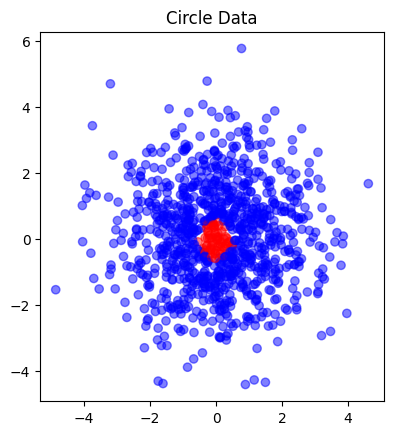

In [2]:
import matplotlib.pyplot as plt

X, y = make_circle_data()
plt.scatter(X[0], X[1], c=y[0], cmap='bwr', alpha=0.5)
plt.gca().set_aspect('equal')
plt.title("Circle Data")
plt.show()


In [6]:
y.shape[1]

1000

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Final training accuracy: 99.80%


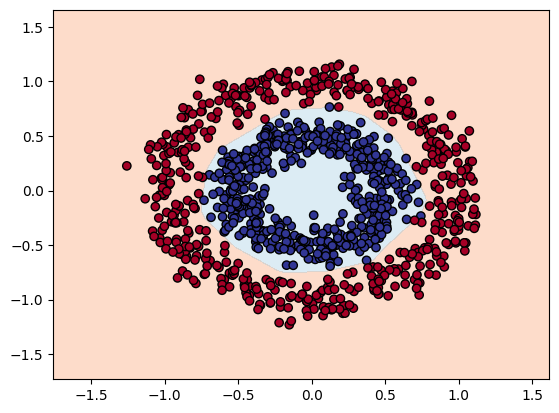

In [9]:
import tensorflow as tf
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np

# 1. Dataset (2D circle classification)
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)

# Convert to tensors
X = tf.convert_to_tensor(X, dtype=tf.float32)
y = tf.convert_to_tensor(y, dtype=tf.float32)

# 2. Define model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu", input_shape=(2,)),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")  # binary classification
])

# 3. Compile (optimizer, loss, metrics)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss="binary_crossentropy",
              metrics=["accuracy"])

# 4. Train
history = model.fit(X, y, epochs=200, batch_size=32, verbose=0)

# 5. Evaluate
loss, acc = model.evaluate(X, y, verbose=0)
print(f"Final training accuracy: {acc*100:.2f}%")

# 6. Plot decision boundary (optional)
xx, yy = np.meshgrid(np.linspace(X[:,0].numpy().min()-0.5, X[:,0].numpy().max()+0.5, 200),
                     np.linspace(X[:,1].numpy().min()-0.5, X[:,1].numpy().max()+0.5, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict(grid, verbose=0).reshape(xx.shape)

plt.contourf(xx, yy, probs, levels=[0,0.5,1], alpha=0.3, cmap="RdYlBu")
plt.scatter(X[:,0], X[:,1], c=y.numpy(), cmap="RdYlBu", edgecolor="k")
plt.show()


Epoch 0: loss=0.7113, acc=50.00%
Epoch 20: loss=0.6761, acc=63.80%
Epoch 40: loss=0.5968, acc=77.60%
Epoch 60: loss=0.4055, acc=92.00%
Epoch 80: loss=0.1776, acc=98.60%
Epoch 100: loss=0.0509, acc=99.40%
Epoch 120: loss=0.0289, acc=99.60%
Epoch 140: loss=0.0218, acc=99.70%
Epoch 160: loss=0.0174, acc=99.70%
Epoch 180: loss=0.0136, acc=99.50%


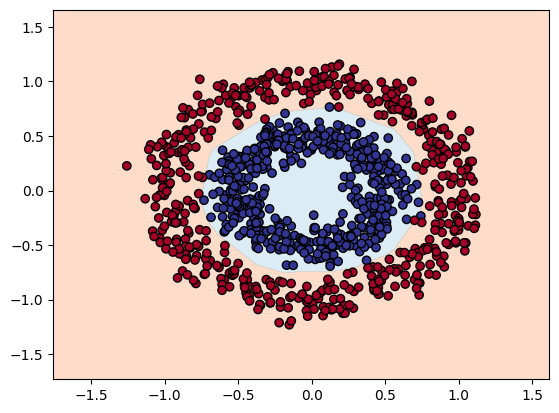

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 1. Make dataset (2D circles, binary classification)
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)

X = torch.tensor(X, dtype=torch.float32)   # shape (1000, 2)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)  # shape (1000, 1)

# 2. Define model
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 16),   # input → hidden
            nn.ReLU(),
            nn.Linear(16, 8),   # hidden → hidden
            nn.ReLU(),
            nn.Linear(8, 1),    # hidden → output
            nn.Sigmoid()        # for binary classification
        )
    def forward(self, x):
        return self.net(x)

model = SimpleNN()

# 3. Loss & Optimizer
criterion = nn.BCELoss()                  # Binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 4. Training loop
for epoch in range(200):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        with torch.no_grad():
            preds = (y_pred > 0.5).float()
            acc = (preds.eq(y).sum() / y.shape[0]).item()
        print(f"Epoch {epoch}: loss={loss.item():.4f}, acc={acc*100:.2f}%")

# 5. Plot decision boundary (optional)
with torch.no_grad():
    x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
    xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 200),
                            torch.linspace(y_min, y_max, 200), indexing="ij")
    grid = torch.cat([xx.reshape(-1,1), yy.reshape(-1,1)], dim=1)
    zz = model(grid).reshape(xx.shape)
plt.contourf(xx, yy, zz, levels=[0,0.5,1], alpha=0.3, cmap="RdYlBu")
plt.scatter(X[:,0], X[:,1], c=y.squeeze(), cmap="RdYlBu", edgecolor="k")
plt.show()
